In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib

## Carga de datos

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [17]:
matplotlib.rc('xtick', labelsize=15)  
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 15})

In [18]:
data = pd.read_csv("advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Text(0, 0.5, 'Sales')

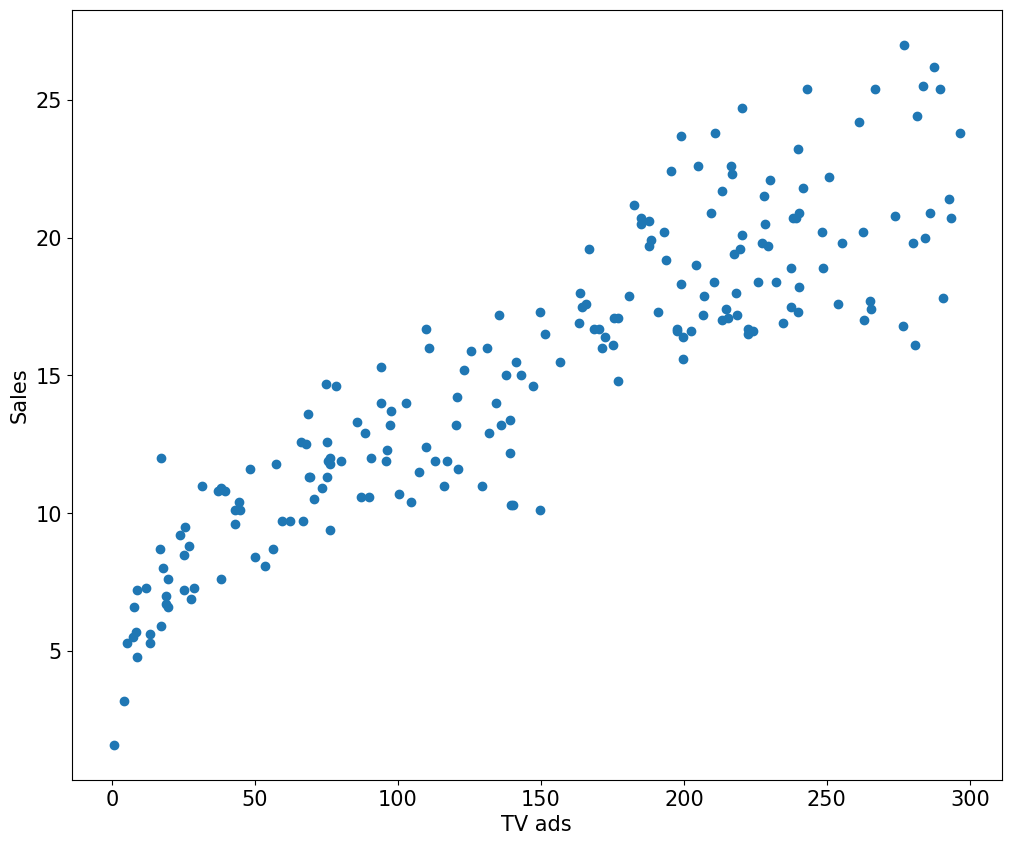

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
ax.scatter(data["TV"], data["Sales"])
ax.set_xlabel("TV ads")
ax.set_ylabel("Sales")

## Cálculo explícito de coeficientes

In [20]:
def covariance(x: pd.Series, y: pd.Series):
    """
    Calcula la covarianza dadas 2 series de input
    """
    mu_x = x.mean()
    mu_y = y.mean()
    N = len(x)
    return sum([(x[i] - mu_x)*(y[i] - mu_y) for i in range(len(x))])/N

def compute_slope(x: pd.Series, y: pd.Series):
    """
    Calcula el coeficiente b1 de la regresión usando y como dependiente y x como dependiente
    """
    return covariance(x, y)/covariance(x, x)

def compute_intercept(x: pd.Series, y: pd.Series, slope: float):
    """
    Calcula el coeficiente b0 de la regresión usando y como dependiente y x como dependiente
    """
    mu_x = x.mean()
    mu_y = y.mean()
    return mu_y - slope*mu_x

def compute_coefs(data: pd.DataFrame, independent_var_name: str, dependent_var_name: str):
    """
    Calcula los coeficientes de la regresión usando un dataframe de entrada
    y los nombres de las columnas independiente y dependiente respectivamente

    Guarda las predicciones en una nueva columna en el dataframe
    """
    independent_var = data[independent_var_name]
    dependent_var = data[dependent_var_name]
    b1 = compute_slope(independent_var, dependent_var)
    b0 = compute_intercept(independent_var, dependent_var, b1)
    data[f"{dependent_var_name}_predictions"] = b0 + b1*independent_var
    return b0, b1

In [21]:
dependent_var_name = "Sales"
independent_var_name = "TV"

b0, b1 = compute_coefs(data, independent_var_name, dependent_var_name)

print(f"Valor de b0: {b0:.2f}")
print(f"Valor de b1: {b1:.3f}")

Valor de b0: 6.97
Valor de b1: 0.055


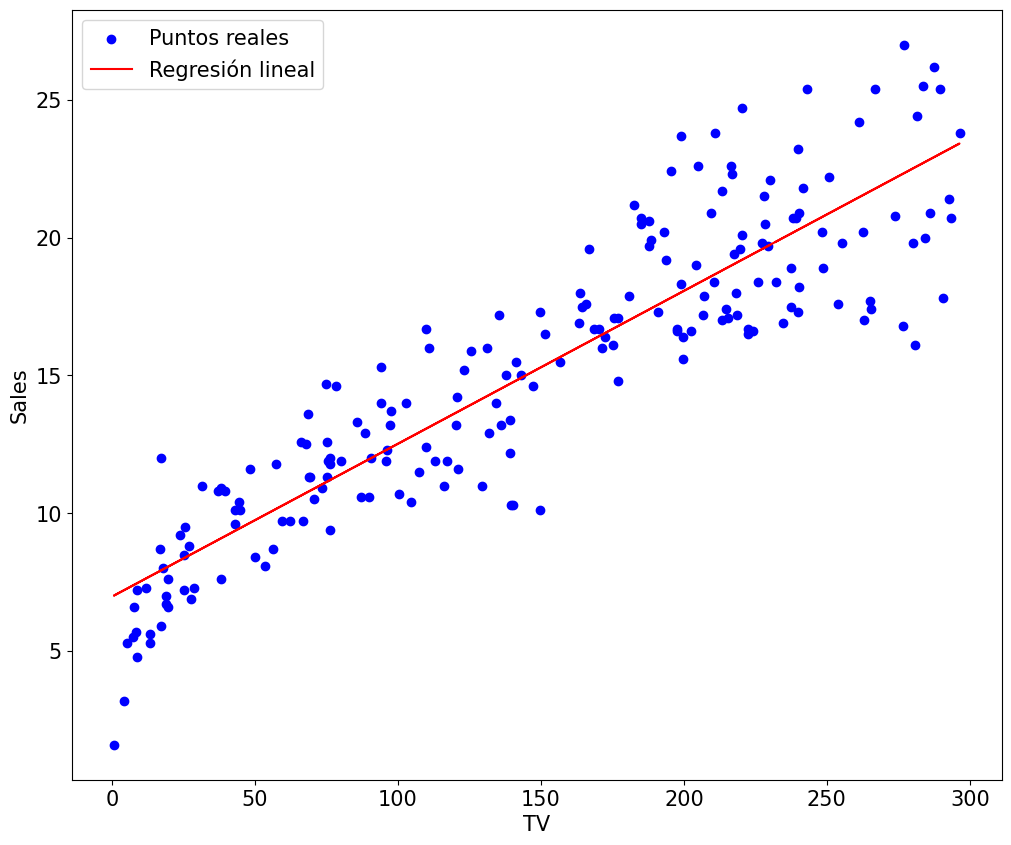

In [22]:
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
ax.scatter(data["TV"], data["Sales"], c = 'blue', label = "Puntos reales")
ax.plot(data["TV"], data["Sales_predictions"], c = 'red', label = "Regresión lineal")
ax.set_xlabel("TV")
ax.set_ylabel("Sales")
ax.legend()

In [23]:
data['sales_prediction'] = b1 * data['TV'] + b0
sales_mean = np.mean(data["Sales"])
data["SSR"]=(data["sales_prediction"]-sales_mean)**2
data["SSD"]=(data["sales_prediction"]-data["Sales"])**2
data["SST"]=(data["Sales"]-sales_mean)**2

# SSR: Suma de los cuadrados de la regresión
SSR = sum(data["SSR"])
# SSD: Suma de los cuadrados de las diferencias
SSD = sum(data["SSD"])
# SST: Suma total de los cuadrados
SST = sum(data["SST"])

R2 = SSR/SST

print(f"El valor de R2 es: {R2:.4f}")

El valor de R2 es: 0.8122


## Significancia de estimadores

In [26]:
import statsmodels.formula.api as smf

# Definir la fórmula de la regresión
formula = 'Sales ~ TV'
# Ajustar el modelo de regresión lineal
model = smf.ols(formula, data=data).fit()
# Obtener el resumen del modelo
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           7.93e-74
Time:                        21:05:49   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9748      0.323     21.624      0.0

Se utiliza la librería statsmodel para poder realizar test estadísticos sobre los estimadores obtenidos en la regresión lineal. Se realiza un test de hipótesis para determinar si los estimadores obtenidos son significativamente diferentes de cero.

Según los resultados se puede concluir lo siguiente:
- Para el estimador B0 (Intercept) con un coeficiente de ~6.97 y un p-valor de 0.0, con un 0.01 de significancia se puede rechazar la hipótesis nula de que el estimador es igual a cero.
- Para el estimador B1 (TV) con un coeficiente de ~0.05 y un p-valor de 0.0, con un 0.01 de significancia se puede rechazar la hipótesis nula de que el estimador es igual a cero.

Por lo tanto, ambos coeficientes son significativamente diferentes de cero, lo que indica que ambos son útiles para predecir la variable de respuesta.

## Análisis de residuales

Los Errores Residuales son la diferencia entre los valores reales y los valores predichos. En otras palabras, el error residual es el error que no se explica por el modelo.

C:\Users\Diego\AppData\Local\Temp\ipykernel_18920\3652338095.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


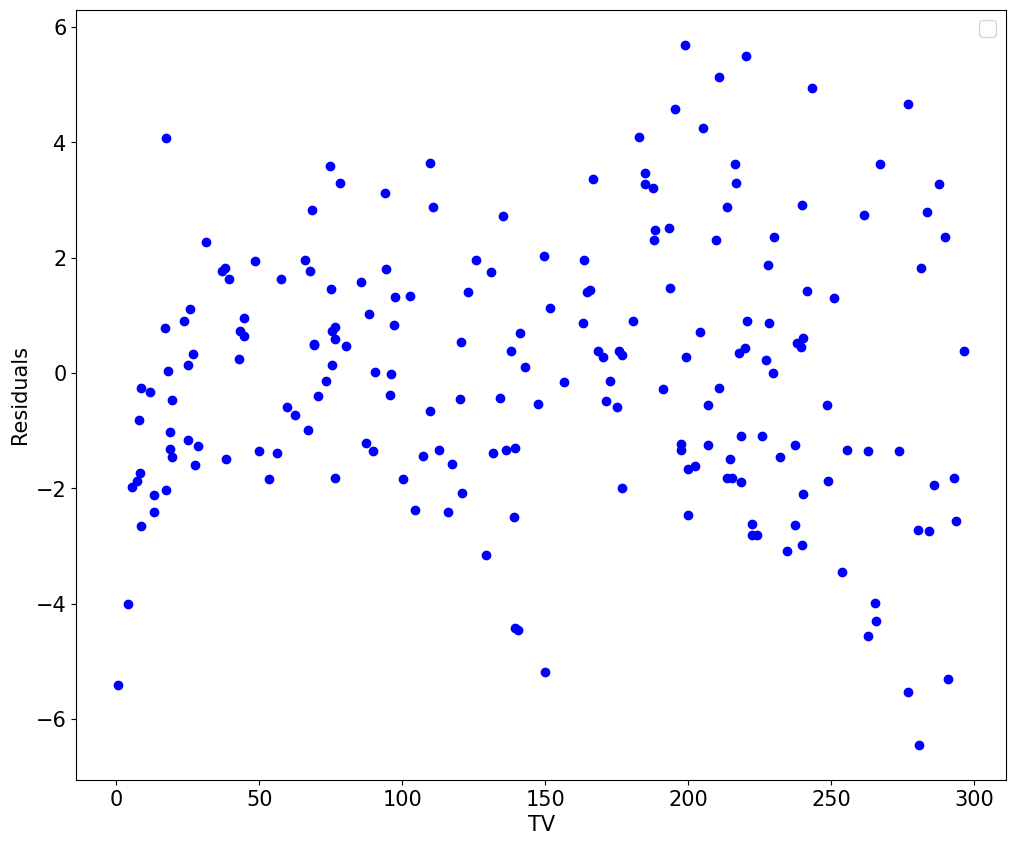

In [31]:
# Linealidad: Errores deben comportarse de forma aleatoria
data['errors'] = data['Sales'] - data['sales_prediction']
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
ax.scatter(data['TV'], data['errors'], c = 'blue')
ax.set_xlabel('TV')
ax.set_ylabel('Residuals')
ax.legend()

En este caso, se grafican los datos de la variable dependiente (TV) contra los residuales del modelo de regresión lineal. Si los residuales no tienen un patrón claro, entonces el modelo de regresión lineal es adecuado para los datos.

En este caso, no se muestra un patrón claro en los residuales, lo que sugiere que el modelo de regresión lineal es adecuado para los datos.

Text(0, 0.5, 'Frequency')

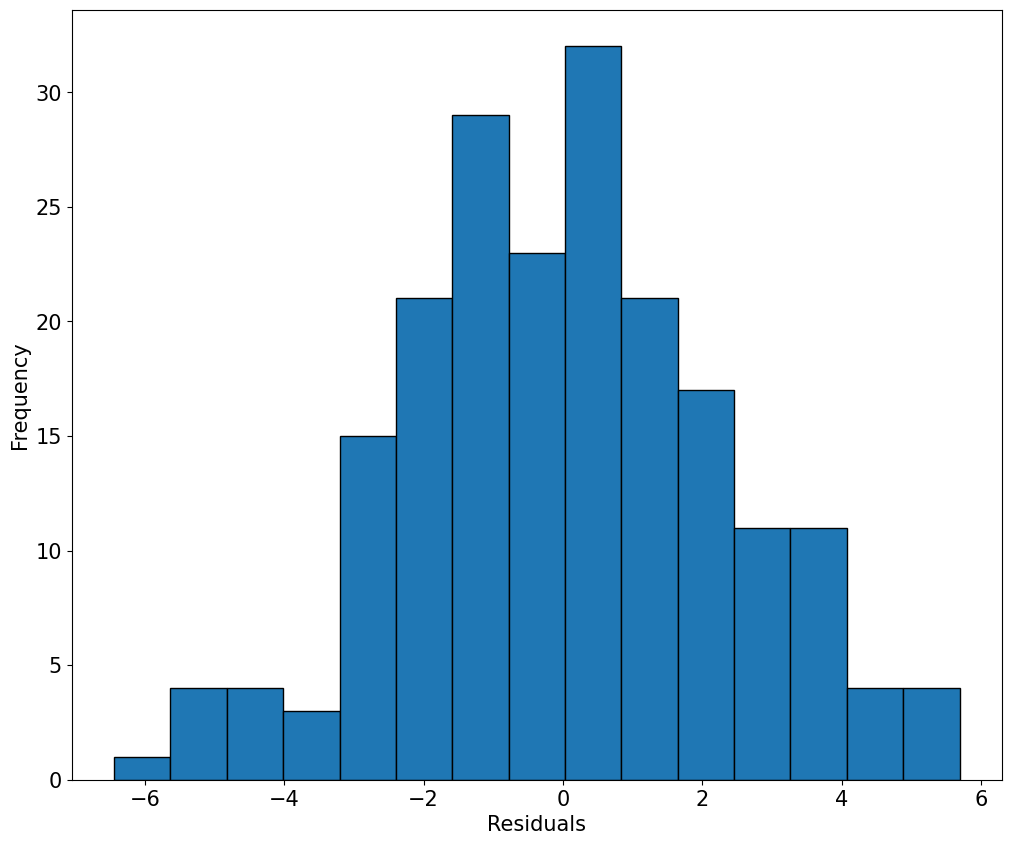

In [30]:
# Normalidad: Errores deben seguir una distribución normal
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
ax.hist(data["errors"], bins = 15, edgecolor = "black")
ax.set_xlabel("Residuals")
ax.set_ylabel("Frequency")

Por otro lado, los errores residuales deben distribuirse normalmente alrededor de cero. En este caso, los errores residuales parecen distribuirse normalmente alrededor de cero, lo que sugiere que el modelo de regresión lineal es adecuado para los datos.

In [18]:
# Homocedasticidad: Varianza de los errores debe ser constante
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan

# Definir la fórmula de la regresión
formula = 'Sales ~ TV'

# Ajustar el modelo de regresión lineal
model = smf.ols(formula, data=data).fit()

# Realizar el test de Breusch-Pagan
bp_test = het_breuschpagan(model.resid, model.model.exog)

# Los resultados del test
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
results = dict(zip(labels, bp_test))

print(f"p-value: {results['p-value']}")


p-value: 8.767332731121619e-05


Por último, otro requisito importante para el modelo de regresión lineal es que los errores residuales deben ser homocedásticos. En otras palabras, los errores residuales deben tener una varianza constante en todos los niveles de la variable independiente. En este caso, se realiza un test de Breusch-Pagan para verificar la homocedasticidad de los errores.

Para interpretar el resultado del test se considera que si el valor p es menor a un alpha (en este caso se tomará 0.05), se rechaza la hipótesis nula y se concluye que los errores no son homocedásticos. En este caso, el valor p es 8.76e-05, por lo que con una significacia del 0.05 existe evidencia que los errores no son homocedásticos. En otras palabras, los errores residuales no tienen una varianza constante en todos los niveles de la variable independiente, por lo que el modelo de regresión lineal no es adecuado para los datos.